This notebook was tested from a GFDL workstation.
This notebook is an example of using catalog builder from a notebook to generate data catalogs, a.k.a intake-esm catalogs.

How to get here? 

Login to your workstation at GFDL.
module load miniforge
conda activate catalogbuilder 
(For the above: Note that you can either install your own environment using the following or use an existing environment such as this: conda activate /nbhome/Aparna.Radhakrishnan/conda/envs/catalogbuilder)

Alternatively (or the primary method)

conda create -n catalogbuilder 
conda install catalogbuilder -c noaa-gfdl -n catalogbuilder

Now, we do a couple of things to make sure your environment is available to jupyter-lab as a kernel.

pip install ipykernel 
python -m ipykernel install --user --name=catalogbuilder

Now, start a jupyter-lab session from GFDL workstation: 

jupyter-lab 

This will give you the URL to the jupyter-lab session running on your localhost. Paste the URL in your web-browser (or via TigerVNC). Paste the notebook cells from this notebook, or locate the notebook from the path where you have downloaded or cloned it via git. Go to Kernel->Change Kernel-> Choose intakebuilder.

Run the notebook and see the results! Extend it and share it with us via a github issue. 


In [47]:
import sys, os 
git_package_dir = '/home/a1r/git/forkCatalogBuilder-/'
sys.path.append(git_package_dir)

import catalogbuilder
from catalogbuilder.scripts import gen_intake_gfdl
######USER input begins########

#User provides the input directory for which a data catalog needs to be generated.

input_path = "/archive/John.Krasting/fre/FMS2024.02_OM5_20240724/CM4.5v01_om5b06_piC_noBLING/gfdl.ncrc5-intel23-prod-openmp/pp/"
#/archive/am5/am5/am5f3b1r0/c96L65_am5f3b1r0_pdclim1850F/gfdl.ncrc5-deploy-prod-openmp/pp/"

#USER inputs the output path. Based on the following setting, user can expect to see /home/a1r/mycatalog.csv and /home/a1r/mycatalog.json generated as output.

output_path = "/home/a1r/tests/mycatalog-jpk"
#NOTE: If your input_path does not look like the above in general, you will need to pass a --config which is custom 
#for your directory structure. See examples below.  
####END OF user input ##########



In [49]:
#This is an example call to run catalog builder using a yaml config file.
configyaml = os.path.join(git_package_dir, 'catalogbuilder/scripts/configs/config-example2.yml')
#input_path = "/archive/am5/am5/am5f3b1r0/c96L65_am5f3b1r0_pdclim1850F/gfdl.ncrc5-deploy-prod-openmp/pp"
#output_path = "sample-mdtf-catalog"

def create_catalog_from_config(input_path=input_path,output_path=output_path,configyaml=configyaml):
    csv, json = gen_intake_gfdl.create_catalog(input_path=input_path,output_path=output_path,config=configyaml)
    return(csv,json)

if __name__ == '__main__':
    create_catalog_from_config(input_path,output_path,configyaml)
    

input_path does not exist in config
output_path does not exist in config
headerlist : ['activity_id', 'institution_id', 'source_id', 'experiment_id', 'frequency', 'realm', 'table_id', 'member_id', 'grid_label', 'variable_id', 'time_range', 'chunk_freq', 'platform', 'dimensions', 'cell_methods', 'standard_name', 'path']
output_path_template : ['NA', 'NA', 'source_id', 'NA', 'experiment_id', 'platform', 'custom_pp', 'realm', 'cell_methods', 'frequency', 'chunk_freq']
output_file_template : ['realm', 'time_range', 'variable_id']
We will use catalog builder catalogbuilder/cats/gfdl_template.json as your json schema
input path:  /archive/John.Krasting/fre/FMS2024.02_OM5_20240724/CM4.5v01_om5b06_piC_noBLING/gfdl.ncrc5-intel23-prod-openmp/pp/  output path:  /home/a1r/tests/mycatalog-jpk
Missing cols from metadata sources: ['activity_id', 'institution_id', 'table_id', 'member_id', 'grid_label', 'dimensions', 'standard_name']
Skipping  .fregrid_remap_file_360_by_180.nc
Skipping  .fregrid_remap_

Found existing file! Overwrite? (y/n) y


writing..
JSON generated at: /home/a1r/tests/mycatalog-jpk.json
CSV generated at: /home/a1r/tests/mycatalog-jpk.csv


Let's begin our analysis

In [50]:
import intake, intake_esm
import matplotlib #do a pip install of tools needed in your env or from the notebook
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [51]:
import intake, intake_esm

In [52]:
col_url = "/home/a1r/tests/mycatalog-jpk.json"
col = intake.open_esm_datastore(col_url)

Explore the catalog

In [53]:
col.df

,activity_id,institution_id,source_id,experiment_id,frequency,realm,table_id,member_id,grid_label,variable_id,time_range,chunk_freq,platform,dimensions,cell_methods,standard_name,path
0,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,day,ocean_daily,NaN,NaN,NaN,zos_min,00110101-00151231,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,NaN,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...
1,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,day,ocean_daily,NaN,NaN,NaN,mlotst,00010101-00051231,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,ocean_mixed_layer_thickness_defined_by_sigma_t,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...
2,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,day,ocean_daily,NaN,NaN,NaN,omldamax,00010101-00051231,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,ocean_mixed_layer_thickness_defined_by_mixing_...,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...
3,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,day,ocean_daily,NaN,NaN,NaN,zos,00110101-00151231,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,sea_surface_height_above_geoid,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...
4,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,day,ocean_daily,NaN,NaN,NaN,sos,00010101-00051231,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,sea_surface_salinity,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,mon,river,NaN,NaN,NaN,rv_o_ice,005601-006012,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,NaN,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...
10001,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,mon,river,NaN,NaN,NaN,rv_Qavg,005601-006012,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,NaN,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...
10002,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,mon,river,NaN,NaN,NaN,rv_T,005601-006012,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,NaN,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...
10003,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,mon,river,NaN,NaN,NaN,rv_veloc,005601-006012,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,NaN,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...


Let's narrow down the search

In [54]:
expname_filter = ['CM4.5v01_om5b06_piC_noBLING']
modeling_realm = "ocean_monthly"
frequency = "mon"

In [55]:
cat = col.search(experiment_id=expname_filter,frequency=frequency,realm=modeling_realm)

In [56]:
set(cat.df["variable_id"])

{'Heat_PmE',
 'LwLatSens',
 'MLD_003',
 'MLD_003_max',
 'MLD_003_min',
 'MLD_EN1',
 'MLD_EN1_max',
 'MLD_EN1_min',
 'MLD_EN2',
 'MLD_EN3',
 'SSH',
 'S_adx_2d',
 'S_ady_2d',
 'T_adx_2d',
 'T_ady_2d',
 'col_height',
 'col_mass',
 'ePBL_h_ML',
 'evs',
 'ficeberg',
 'friver',
 'fsitherm',
 'heat_content_cond',
 'heat_content_fprec',
 'heat_content_massin',
 'heat_content_massout',
 'heat_content_surfwater',
 'heat_content_vprec',
 'hf_CAu_2d',
 'hf_CAv_2d',
 'hf_PFu_2d',
 'hf_PFv_2d',
 'hf_diffu_2d',
 'hf_diffv_2d',
 'hf_du_dt_visc_2d',
 'hf_dudt_2d',
 'hf_dv_dt_visc_2d',
 'hf_dvdt_2d',
 'hf_gKEu_2d',
 'hf_gKEv_2d',
 'hf_rvxu_2d',
 'hf_rvxv_2d',
 'hf_u_BT_accel_2d',
 'hf_v_BT_accel_2d',
 'hfds',
 'hfevapds',
 'hfibthermds',
 'hflso',
 'hfrainds',
 'hfrunoffds',
 'hfsifrazil',
 'hfsnthermds',
 'hfsso',
 'intz_CAu_2d',
 'intz_CAv_2d',
 'intz_PFu_2d',
 'intz_PFv_2d',
 'intz_diffu_2d',
 'intz_diffv_2d',
 'intz_gKEu_2d',
 'intz_gKEv_2d',
 'intz_rvxu_2d',
 'intz_rvxv_2d',
 'intz_u_BT_accel_2d',


In [57]:
cat = cat.search(variable_id="sos") #Total Soil Moisture Content

dmget the files

In [58]:
cat

,unique
activity_id,1
institution_id,0
source_id,1
experiment_id,1
frequency,1
realm,1
table_id,0
member_id,0
grid_label,0
variable_id,1


In [59]:
#for simple dmget usage, just use this !dmget {file}
#use following to wrap the dmget call for each path in the catalog
def dmgetmagic(x):
    cmd = 'dmget %s'% str(x) 
    return os.system(cmd)

#OR refer to importing dmget ,  https://github.com/aradhakrishnanGFDL/canopy-cats/tree/main/notebooks/dmget.py

In [60]:
dmstatus = cat.df["path"].apply(dmgetmagic)

In [61]:
dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {'time':5}, 'decode_times': True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'source_id.experiment_id.frequency.realm.chunk_freq.time_range'


In [62]:
for k in dset_dict.keys(): 
    print(k)

fre.CM4.5v01_om5b06_piC_noBLING.mon.ocean_monthly.5yr.000601-001012
fre.CM4.5v01_om5b06_piC_noBLING.mon.ocean_monthly.5yr.000101-000512
fre.CM4.5v01_om5b06_piC_noBLING.mon.ocean_monthly.5yr.004601-005012
fre.CM4.5v01_om5b06_piC_noBLING.mon.ocean_monthly.5yr.002601-003012
fre.CM4.5v01_om5b06_piC_noBLING.mon.ocean_monthly.5yr.002101-002512
fre.CM4.5v01_om5b06_piC_noBLING.mon.ocean_monthly.5yr.001601-002012
fre.CM4.5v01_om5b06_piC_noBLING.mon.ocean_monthly.5yr.003101-003512
fre.CM4.5v01_om5b06_piC_noBLING.mon.ocean_monthly.5yr.003601-004012
fre.CM4.5v01_om5b06_piC_noBLING.mon.ocean_monthly.5yr.005101-005512
fre.CM4.5v01_om5b06_piC_noBLING.mon.ocean_monthly.5yr.005601-006012
fre.CM4.5v01_om5b06_piC_noBLING.mon.ocean_monthly.5yr.001101-001512


In [63]:
ds = dset_dict[k]

In [64]:
ds

<xarray.Dataset> Size: 401MB
Dimensions:     (time: 60, nv: 2, yh: 1161, xh: 1440)
Coordinates:
  * nv          (nv) float64 16B 1.0 2.0
  * time        (time) object 480B 0011-01-16 12:00:00 ... 0015-12-16 12:00:00
  * xh          (xh) float64 12kB -299.9 -299.6 -299.4 ... 59.38 59.62 59.88
  * yh          (yh) float64 9kB -88.52 -88.42 -88.32 ... 89.73 89.84 89.95
Data variables:
    average_DT  (time) timedelta64[ns] 480B dask.array<chunksize=(5,), meta=np.ndarray>
    average_T1  (time) object 480B dask.array<chunksize=(5,), meta=np.ndarray>
    average_T2  (time) object 480B dask.array<chunksize=(5,), meta=np.ndarray>
    sos         (time, yh, xh) float32 401MB dask.array<chunksize=(5, 1161, 1440), meta=np.ndarray>
    time_bnds   (time, nv) object 960B dask.array<chunksize=(5, 2), meta=np.ndarray>
Attributes: (12/20)
    title:                           CM4.5v01_om5b06_piC_noBLING
    associated_files:                areacello: 00110101.ocean_static.nc
    grid_type:                       regular
    grid_tile:                       N/A
    external_variables:              areacello
    intake_esm_vars:                 ['sos']
    ...                              ...
    intake_esm_attrs:platform:       gfdl.ncrc5-intel23-prod-openmp
    intake_esm_attrs:cell_methods:   ts
    intake_esm_attrs:standard_name:  sea_surface_salinity
    intake_esm_attrs:path:           /archive/John.Krasting/fre/FMS2024.02_OM...
    intake_esm_attrs:_data_format_:  netcdf
    intake_esm_dataset_key:          fre.CM4.5v01_om5b06_piC_noBLING.mon.ocea...

In [65]:
ds["sos"]

<xarray.DataArray 'sos' (time: 60, yh: 1161, xh: 1440)> Size: 401MB
dask.array<open_dataset-sos, shape=(60, 1161, 1440), dtype=float32, chunksize=(5, 1161, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 480B 0011-01-16 12:00:00 ... 0015-12-16 12:00:00
  * xh       (xh) float64 12kB -299.9 -299.6 -299.4 -299.1 ... 59.38 59.62 59.88
  * yh       (yh) float64 9kB -88.52 -88.42 -88.32 -88.23 ... 89.73 89.84 89.95
Attributes:
    units:          psu
    long_name:      Sea Surface Salinity
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_salinity

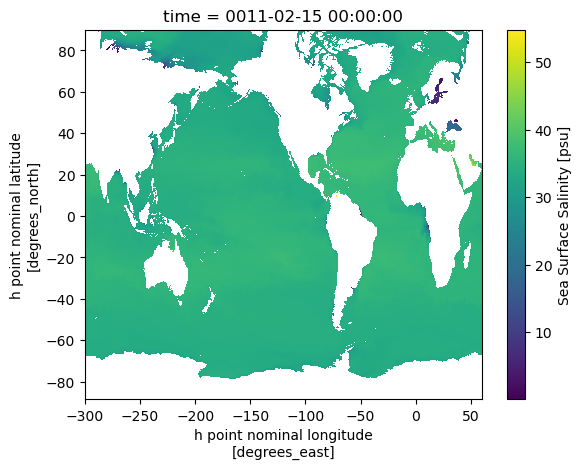

In [66]:
sos = ds.sos.isel(time=1).plot()

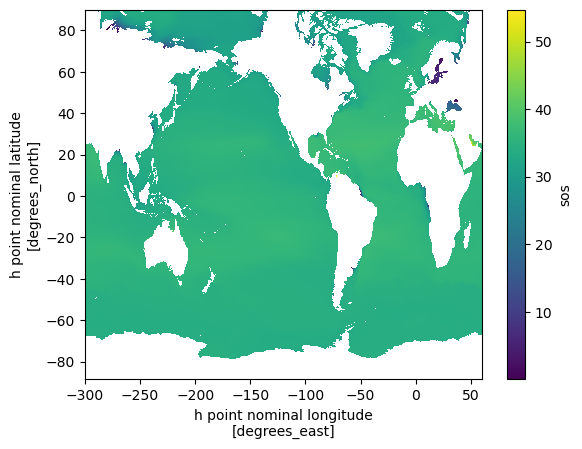

In [67]:
ds.sos.mean(dim='time').plot()